### Imports

In [33]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import pickle

# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
# sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
# Not italized latex
matplotlib.rcParams["mathtext.default"] = "regular"
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='png'

# Retina quality for plots
%config InlineBackend.figure_format = 'retina'


### Load data

In [34]:
df_input = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3_normalized/input_particles.parquet"
)
df_output = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3_normalized/output_particles.parquet"
)

with open(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0000/gen_3_normalized/observables.pkl",
    "rb",
) as f:
    dic_obs = pickle.load(f)

dic_obs

{'l_df_particles': [    particle_id         x        px             y            py      zeta  \
  0             0 -0.000148 -0.000002  1.930898e-05  4.032228e-08 -0.000008   
  1             1  0.000229 -0.000009  1.261245e-05  1.029821e-07 -0.000002   
  2             2  0.000606 -0.000016  5.915909e-06  1.656419e-07  0.000005   
  3             3  0.000984 -0.000023 -7.806280e-07  2.283018e-07  0.000011   
  4             4  0.001361 -0.000030 -7.477165e-06  2.909616e-07  0.000017   
  5             5  0.001738 -0.000037 -1.417370e-05  3.536215e-07  0.000023   
  6             6  0.002116 -0.000044 -2.087024e-05  4.162813e-07  0.000030   
  7             7  0.002493 -0.000051 -2.756678e-05  4.789411e-07  0.000036   
  8             8  0.002871 -0.000058 -3.426331e-05  5.416010e-07  0.000042   
  9             9  0.003248 -0.000065 -4.095985e-05  6.042608e-07  0.000048   
  10           10  0.003625 -0.000072 -4.765639e-05  6.669206e-07  0.000055   
  11           11  0.004003 -0.000

### Plot initial distribution

/tmp/ipykernel_2956/2729111218.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[0].scatter(x_input, px_input, s=1, c = None, cmap = "magma")
/tmp/ipykernel_2956/2729111218.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(y_input, py_input, s=1, c = None, cmap = "magma")


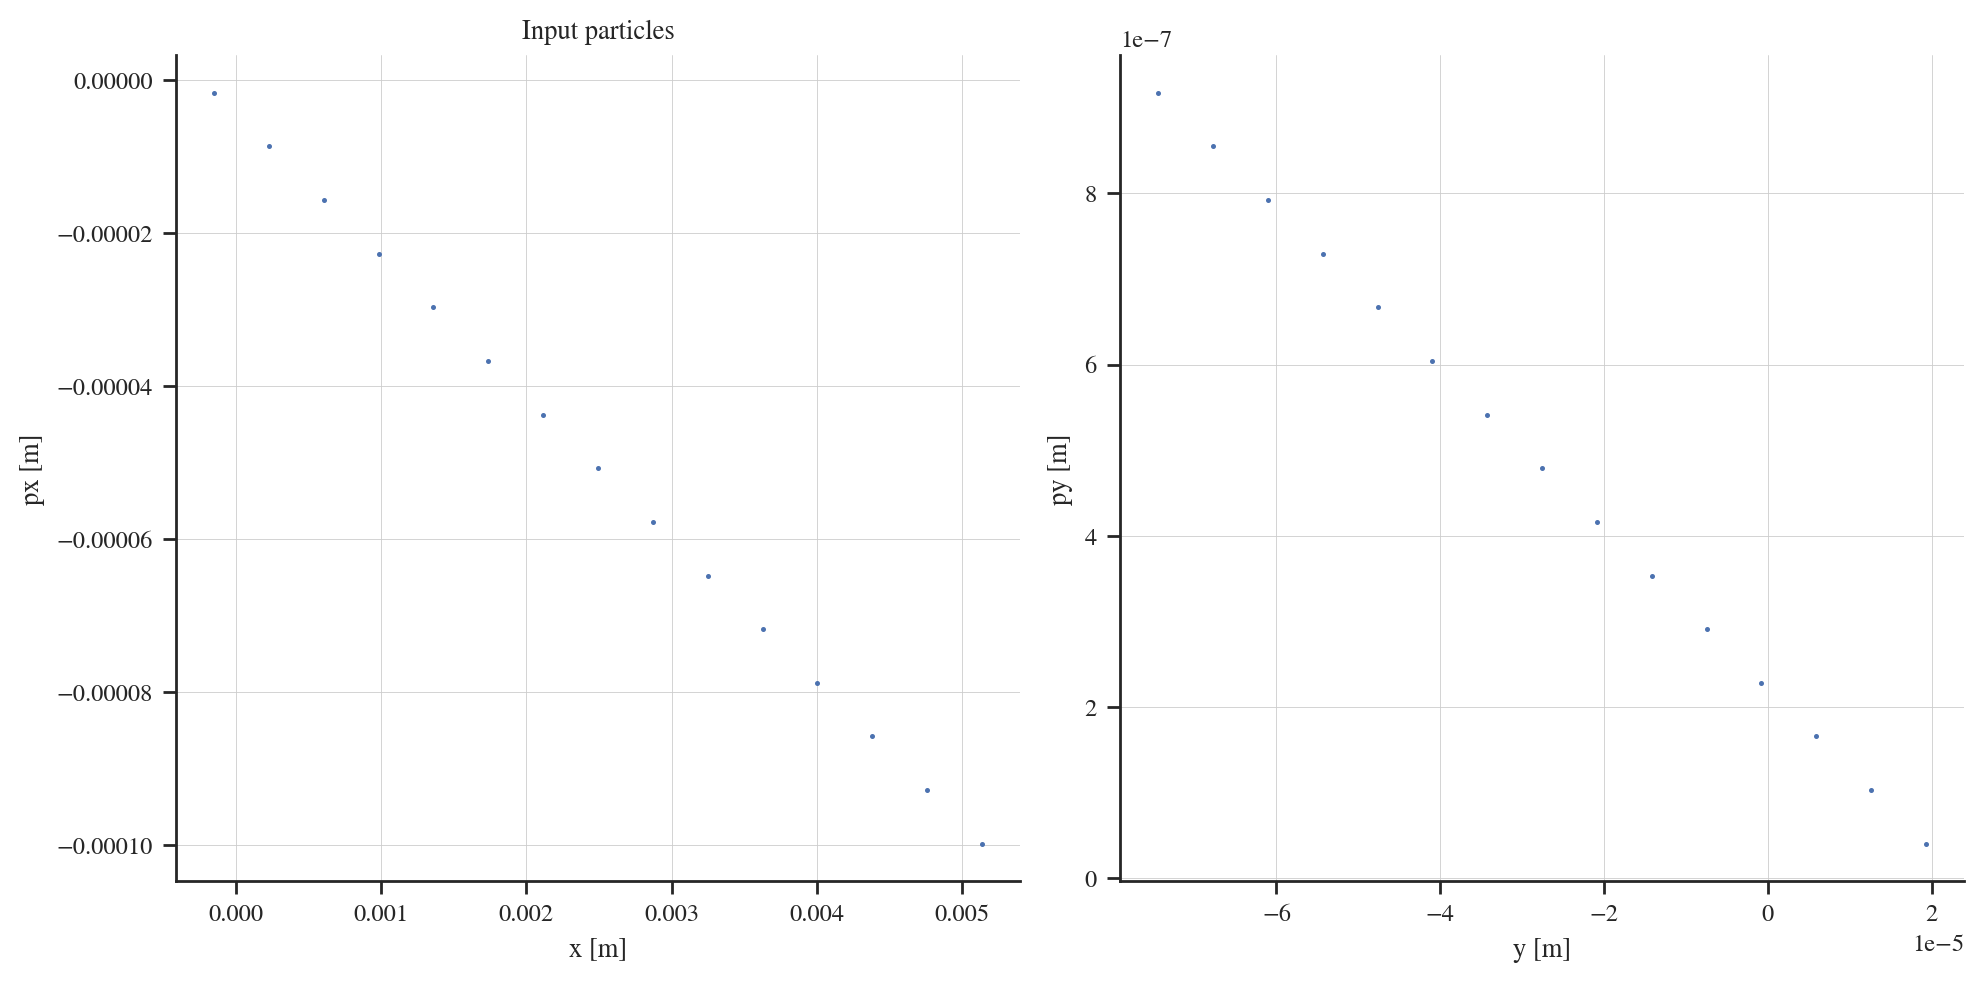

In [36]:
x_input = df_input["x"]
y_input = df_input["y"]
px_input = df_input["px"]
py_input = df_input["py"]


# # Calculate the point density
# array_x_density = np.vstack([x_input,px_input])
# x_density = gaussian_kde(array_x_density)(array_x_density)
# array_y_density = np.vstack([y_input,py_input])
# y_density = gaussian_kde(array_y_density)(array_y_density)


# Plot input particles (two subplots for x and y)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_input, px_input, s=1, c = None, cmap = "magma")
ax[0].set_xlabel("x [m]")
ax[0].set_ylabel("px [m]")
ax[0].set_title("Input particles")
ax[0].grid()
ax[1].scatter(y_input, py_input, s=1, c = None, cmap = "magma")
ax[1].set_xlabel("y [m]")
ax[1].set_ylabel("py [m]")
ax[1].grid()
plt.tight_layout()
plt.show()

### Plot evolution octupoles

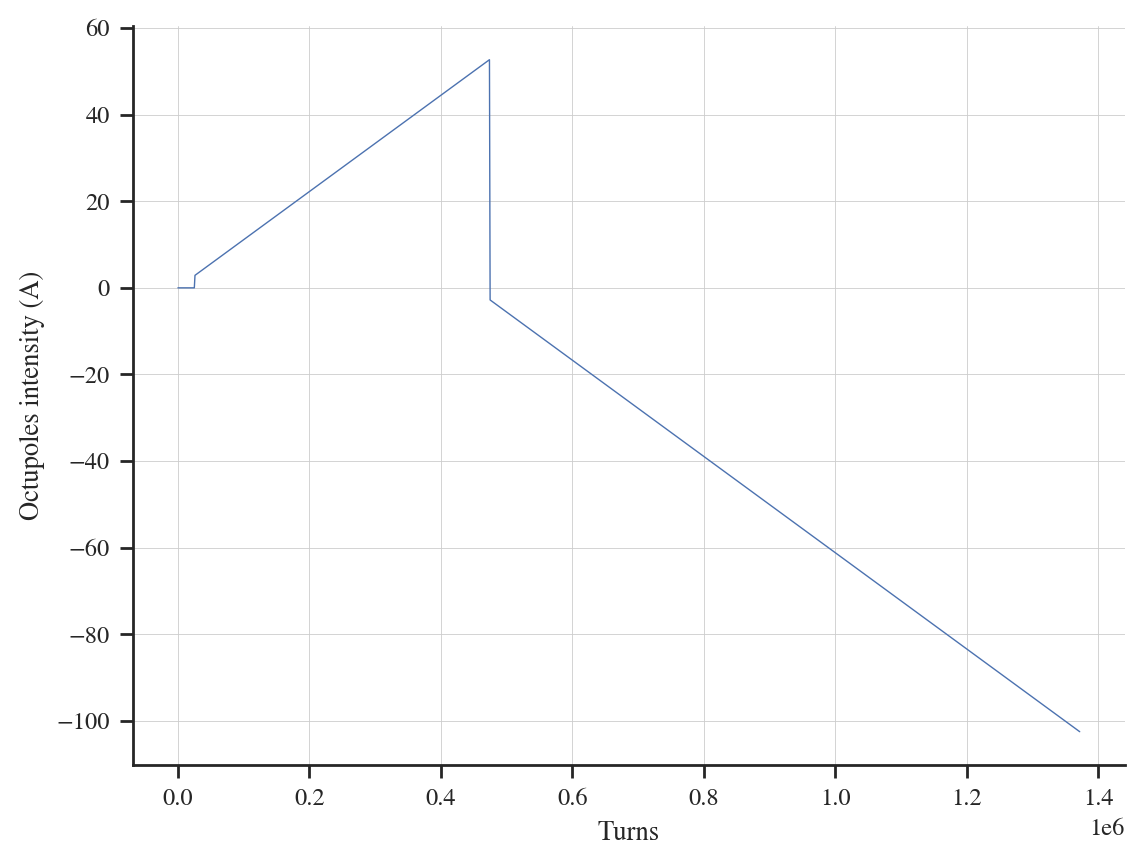

In [21]:
plt.plot(df["n_turns"], df["octupoles"])
plt.xlabel("Turns")
plt.ylabel("Octupoles intensity (A)")
plt.grid()
plt.show()


### Plot evolution particles loss

In [24]:
df['n_particles'] = df['particles_x'].apply(lambda x: len(x))
df['n_particles_lost'] = df['n_particles'].max() - df['n_particles']

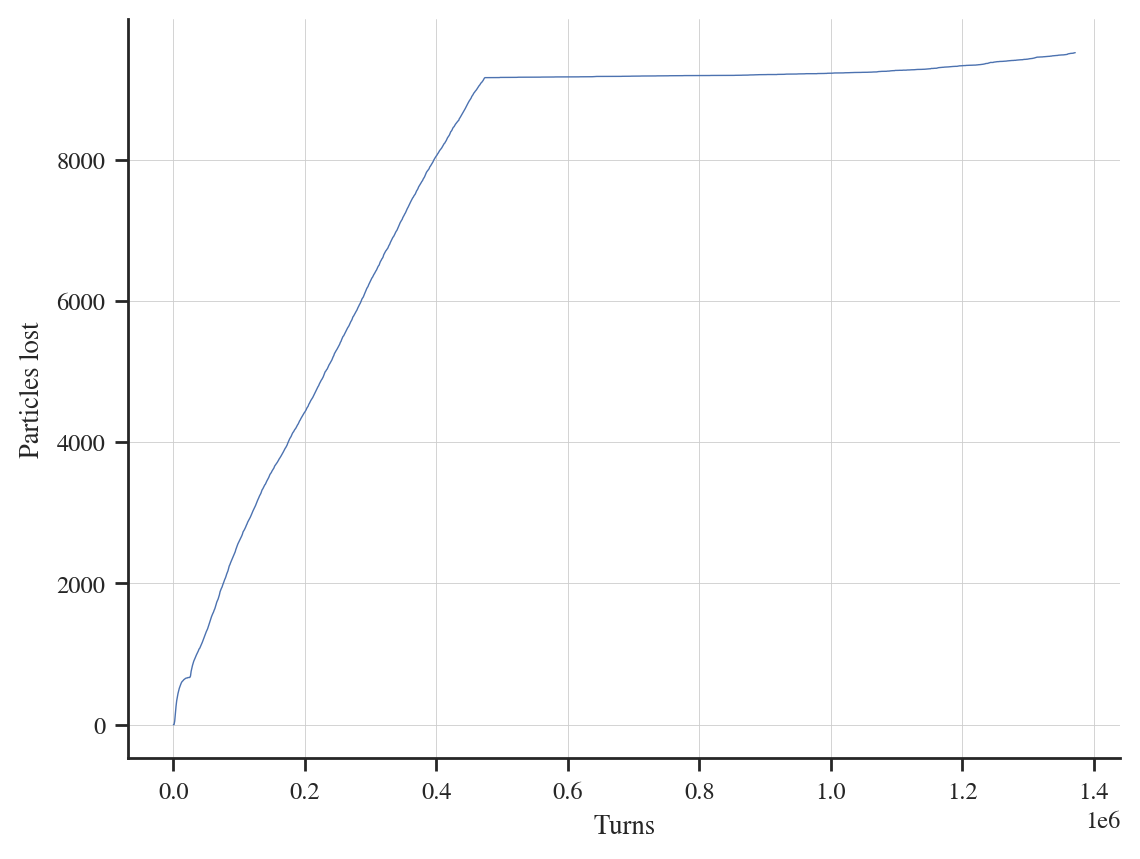

In [26]:
plt.plot(df["n_turns"], df["n_particles_lost"])
plt.xlabel("Turns")
plt.ylabel("Particles lost")
plt.grid()
plt.show()


In [ ]:
        # Get emittance
        emittance_x = np.sqrt(
            np.mean(particles_x**2) * np.mean(particles_px**2)
            - np.mean(particles_x * particles_px) ** 2
        )
        emittance_y = np.sqrt(
            np.mean(particles_y**2) * np.mean(particles_py**2)
            - np.mean(particles_y * particles_py) ** 2
        )

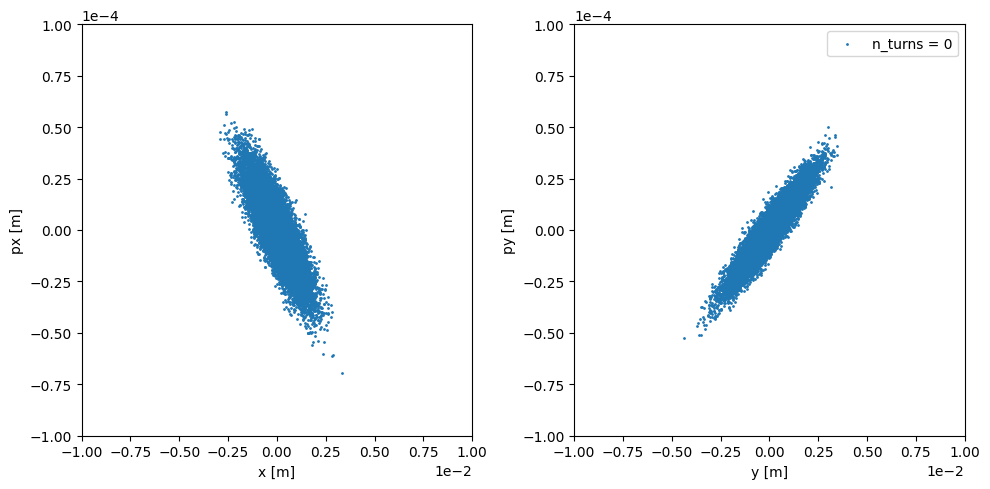

In [4]:
# Plot output particles (two subplots for x and y) at each turn from df
for index, row in df.iterrows():
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    # Plot x against px
    ax[0].scatter(row['particles_x'], row['particles_px'], label=f'n_turns = {row["n_turns"]}', s = 1)
    ax[0].set_xlabel('x [m]')
    ax[0].set_ylabel('px [m]')
    # Plot y against py
    ax[1].scatter(row['particles_y'], row['particles_py'], label=f'n_turns = {row["n_turns"]}', s = 1 )
    ax[1].set_xlabel('y [m]')
    ax[1].set_ylabel('py [m]')
    ax[0].set_xlim(-0.01, 0.01)
    ax[0].set_ylim(-0.0001, 0.0001)
    ax[1].set_xlim(-0.01, 0.01)
    ax[1].set_ylim(-0.0001, 0.0001)
    # Change ticks to scientific notation
    ax[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    ax[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    plt.tight_layout()
    plt.legend()
    plt.show()
    break
    





20000
20000
19998
19948
19844
19740
19661
19606
19558
19520
19484
19457
19433
19409
19392
19383
19373
19361
19356
19347
19342
19339
19339
19333
19333
19332
19331
19311
19244
19202
19162
19129
19100
19079
19057
19033
19012
18993
18973
18954
18929
18919
18898
18880
18856
18833
18808
18786
18755
18732
18709
18684
18664
18643
18612
18586
18556
18531
18501
18470
18446
18425
18406
18379


KeyboardInterrupt: 

20000


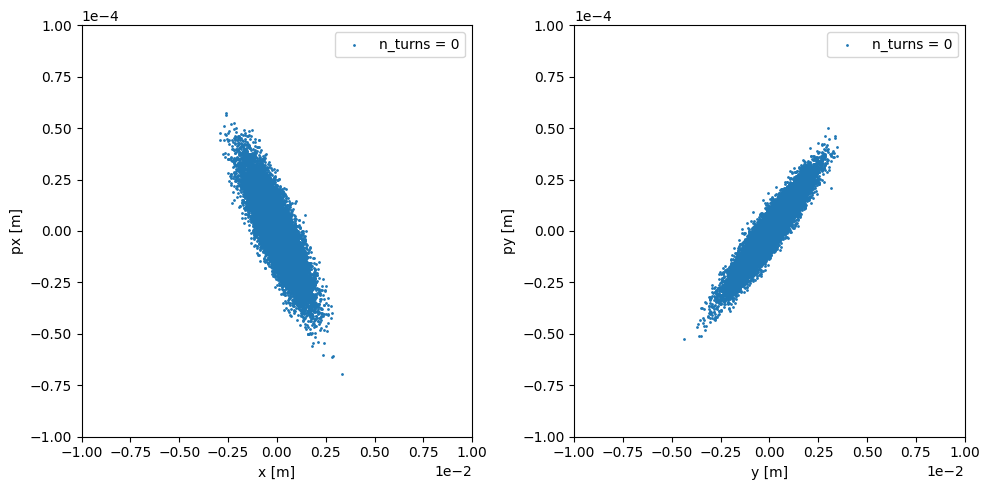

In [5]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assume df is your DataFrame
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

def update(frame):
    ax[0].clear()
    ax[1].clear()
    
    row = df.iloc[frame]

    print(len(row['particles_x']))

    ax[0].scatter(row['particles_x'], row['particles_px'], label=f'n_turns = {row["n_turns"]}', s=1)
    ax[0].set_xlabel('x [m]')
    ax[0].set_ylabel('px [m]')

    ax[1].scatter(row['particles_y'], row['particles_py'], label=f'n_turns = {row["n_turns"]}', s=1)
    ax[1].set_xlabel('y [m]')
    ax[1].set_ylabel('py [m]')

    ax[0].set_xlim(-0.01, 0.01)
    ax[0].set_ylim(-0.0001, 0.0001)
    ax[1].set_xlim(-0.01, 0.01)
    ax[1].set_ylim(-0.0001, 0.0001)

    ax[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    ax[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))

    # Position legend at top right
    ax[0].legend( loc='upper right')
    ax[1].legend( loc='upper right')

    plt.tight_layout()

# Assuming you have df as your DataFrame
animation = FuncAnimation(fig, update, frames=len(df), interval=100, repeat=False)

# Save the animation as a GIF using PillowWriter
animation.save('animation.gif', writer='pillow', fps=1)

plt.show()
